In [3]:
#library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [4]:
import flask

In [5]:
data1=pd.read_excel("C:\\Users\\manohara.a\\Downloads\\emerson\\pdsl\\PSD_Combined01OCT19To20OCT19.xlsx")
data1=data1.loc[data1["FLOW_STATUS_CODE"]=="CLOSED"]

In [6]:
data1["FLOW_STATUS_CODE"].value_counts()

CLOSED    12579
Name: FLOW_STATUS_CODE, dtype: int64

In [7]:
#Take out unwanted columns
drop_columns=['MODEL_STRING','ECCN','END_USE','SIC_CODE','HTSN','EXPORT_FLAG','REASON_FOR_SUSPICION','SHIP_SET','HOLD_APPLIED_BY','HOLD_RELEASED_BY']
data=data1.drop(drop_columns,axis=1)
data=data[data['PROMISE_DATE'].notnull()].drop_duplicates()
data.head()

ORDER_NUMBER  ORG_ID  HEADER_ID ORDERED_DATE LAST_UPDATE_DATE  \
0       1857126    1703   51292189    01-OCT-19        02-NOV-19   
1       1857126    1703   51292189    01-OCT-19        03-OCT-19   
2       1857126    1703   51292189    01-OCT-19        03-OCT-19   
3       1857128    1703   51292191    01-OCT-19        19-NOV-19   
4       1857183    1703   51292296    01-OCT-19        04-OCT-19   

  FLOW_STATUS_CODE PROMISE_DATE SCHEDULE_SHIP_DATE REQUEST_DATE  \
0           CLOSED    01-NOV-19          28-OCT-19    11-NOV-19   
1           CLOSED    02-OCT-19          28-OCT-19    11-NOV-19   
2           CLOSED    02-OCT-19          28-OCT-19    11-NOV-19   
3           CLOSED    16-DEC-19          02-DEC-19    16-DEC-19   
4           CLOSED    03-OCT-19          25-OCT-19    29-OCT-19   

  SOURCE_TYPE_CODE  ... DELIVERY_ID SHIP_TO_COUNTRY SHIP_FROM_COUNTRY  \
0         INTERNAL  ...    63598144              AE                BS   
1         INTERNAL  ...    62861358              AE                BS   
2         INTERNAL  ...    62861358              AE                BS   
3         INTERNAL  ...    63989993              AE                US   
4         INTERNAL  ...    62877990              PR                BS   

  INITIAL_PICKUP_DATE ULTIMATE_DROPOFF_DATE  HEADER_ID_1     LINE_ID  \
0           01-NOV-19             11-NOV-19     51292189  1218963611   
1           02-OCT-19             11-NOV-19     51292189  1218963615   
2           02-OCT-19             11-NOV-19     51292189  1218963615   
3           19-NOV-19             16-DEC-19     51292191  1218963619   
4           03-OCT-19             29-OCT-19     51292296  1219099210   

                             HOLD_NAME  HOLD_CREATION_DATE HOLD_RELEASE_DATE  
0   EMR Export Screening Pick Hold TSE           01-OCT-19         01-OCT-19  
1  SCHEDULING - SCHEDULING REVIEW HOLD           01-OCT-19         01-OCT-19  
2   EMR Export Screening Pick Hold TSE           01-OCT-19         01-OCT-19  
3  Country of Origin Hold - Parts VLVS           01-NOV-19         01-NOV-19  
4   EMR Export Screening Pick Hold TSE           01-OCT-19         01-OCT-19  

[5 rows x 30 columns]

In [8]:
list(data.columns)

['ORDER_NUMBER',
 'ORG_ID',
 'HEADER_ID',
 'ORDERED_DATE',
 'LAST_UPDATE_DATE',
 'FLOW_STATUS_CODE',
 'PROMISE_DATE',
 'SCHEDULE_SHIP_DATE',
 'REQUEST_DATE',
 'SOURCE_TYPE_CODE',
 'OE_TRANSACTION_TYPES',
 'ITEM_TYPE_CODE',
 'ORDERED_ITEM',
 'ULTIMATE_DEST',
 'END_USER_SPECIFIC_PRODUCTS',
 'ORDERED_QUANTITY',
 'REQUESTED_QUANTITY',
 'SHIPPED_QUANTITY',
 'PICKED_QUANTITY',
 'SHIPPING_METHOD_CODE',
 'DELIVERY_ID',
 'SHIP_TO_COUNTRY',
 'SHIP_FROM_COUNTRY',
 'INITIAL_PICKUP_DATE',
 'ULTIMATE_DROPOFF_DATE',
 'HEADER_ID_1',
 'LINE_ID',
 'HOLD_NAME',
 'HOLD_CREATION_DATE',
 'HOLD_RELEASE_DATE']

In [9]:
data.count()

ORDER_NUMBER                  12533
ORG_ID                        12533
HEADER_ID                     12533
ORDERED_DATE                  12533
LAST_UPDATE_DATE              12533
FLOW_STATUS_CODE              12533
PROMISE_DATE                  12533
SCHEDULE_SHIP_DATE            12533
REQUEST_DATE                  12533
SOURCE_TYPE_CODE              12533
OE_TRANSACTION_TYPES          12533
ITEM_TYPE_CODE                12533
ORDERED_ITEM                  12533
ULTIMATE_DEST                 12532
END_USER_SPECIFIC_PRODUCTS    12533
ORDERED_QUANTITY              12533
REQUESTED_QUANTITY            12533
SHIPPED_QUANTITY              12533
PICKED_QUANTITY               12533
SHIPPING_METHOD_CODE          12115
DELIVERY_ID                   12533
SHIP_TO_COUNTRY               12533
SHIP_FROM_COUNTRY             12533
INITIAL_PICKUP_DATE           12533
ULTIMATE_DROPOFF_DATE         12533
HEADER_ID_1                   12533
LINE_ID                       12533
HOLD_NAME                   

In [10]:
#aggrgating data at Line ID level
data["hold_applied"]=data["HOLD_NAME"].apply(lambda x: '1' if x!="" else '0')
#holds_data
holds_data=data.drop(['HOLD_NAME','HOLD_CREATION_DATE','HOLD_RELEASE_DATE','DELIVERY_ID','REQUESTED_QUANTITY','PICKED_QUANTITY'],axis=1).drop_duplicates()
joindata=holds_data.groupby(["LINE_ID"]).agg({"SHIPPED_QUANTITY":'sum',"ORDERED_QUANTITY":'sum'})
main_data=holds_data.drop(["SHIPPED_QUANTITY","ORDERED_QUANTITY"],axis=1).drop_duplicates()

In [11]:
holds_data.dtypes

ORDER_NUMBER                    int64
ORG_ID                          int64
HEADER_ID                       int64
ORDERED_DATE                   object
LAST_UPDATE_DATE               object
FLOW_STATUS_CODE               object
PROMISE_DATE                   object
SCHEDULE_SHIP_DATE             object
REQUEST_DATE                   object
SOURCE_TYPE_CODE               object
OE_TRANSACTION_TYPES           object
ITEM_TYPE_CODE                 object
ORDERED_ITEM                   object
ULTIMATE_DEST                  object
END_USER_SPECIFIC_PRODUCTS     object
ORDERED_QUANTITY                int64
SHIPPED_QUANTITY              float64
SHIPPING_METHOD_CODE           object
SHIP_TO_COUNTRY                object
SHIP_FROM_COUNTRY              object
INITIAL_PICKUP_DATE            object
ULTIMATE_DROPOFF_DATE          object
HEADER_ID_1                     int64
LINE_ID                         int64
hold_applied                   object
dtype: object

In [12]:
print(main_data.shape)
print(joindata.shape)

(6877, 23)
(6877, 2)


In [13]:
joindata
main_data

ORDER_NUMBER  ORG_ID  HEADER_ID ORDERED_DATE LAST_UPDATE_DATE  \
0           1857126    1703   51292189    01-OCT-19        02-NOV-19   
1           1857126    1703   51292189    01-OCT-19        03-OCT-19   
3           1857128    1703   51292191    01-OCT-19        19-NOV-19   
4           1857183    1703   51292296    01-OCT-19        04-OCT-19   
5           1857183    1703   51292296    01-OCT-19        04-OCT-19   
...             ...     ...        ...          ...              ...   
12578       1864193    1703   51630326    19-OCT-19        23-OCT-19   
12580       1864193    1703   51630326    19-OCT-19        23-OCT-19   
12589       1863785    1703   51630872    18-OCT-19        23-OCT-19   
12590       1863785    1703   51630872    18-OCT-19        23-OCT-19   
12596       1863902    1703   51630937    18-OCT-19        23-JAN-20   

      FLOW_STATUS_CODE PROMISE_DATE SCHEDULE_SHIP_DATE REQUEST_DATE  \
0               CLOSED    01-NOV-19          28-OCT-19    11-NOV-19   
1               CLOSED    02-OCT-19          28-OCT-19    11-NOV-19   
3               CLOSED    16-DEC-19          02-DEC-19    16-DEC-19   
4               CLOSED    03-OCT-19          25-OCT-19    29-OCT-19   
5               CLOSED    03-OCT-19          25-OCT-19    29-OCT-19   
...                ...          ...                ...          ...   
12578           CLOSED    22-OCT-19          21-OCT-19    22-OCT-19   
12580           CLOSED    22-OCT-19          21-OCT-19    22-OCT-19   
12589           CLOSED    22-OCT-19          18-OCT-19    21-OCT-19   
12590           CLOSED    22-OCT-19          18-OCT-19    21-OCT-19   
12596           CLOSED    31-JAN-20          10-JAN-20    10-JAN-20   

      SOURCE_TYPE_CODE  ...         ULTIMATE_DEST  \
0             INTERNAL  ...  United Arab Emirates   
1             INTERNAL  ...  United Arab Emirates   
3             INTERNAL  ...  United Arab Emirates   
4             INTERNAL  ...           Puerto Rico   
5             INTERNAL  ...           Puerto Rico   
...                ...  ...                   ...   
12578         INTERNAL  ...                Canada   
12580         INTERNAL  ...                Canada   
12589         INTERNAL  ...                Brazil   
12590         INTERNAL  ...                Brazil   
12596         INTERNAL  ...    Korea, Republic of   

                              END_USER_SPECIFIC_PRODUCTS  \
0                                     Stock Order IR/ISO   
1                                     Stock Order IR/ISO   
3                                     Stock Order IR/ISO   
4      Spare parts for control valve handlingprocess ...   
5      Spare parts for control valve handlingprocess ...   
...                                                  ...   
12578                                 Stock Order IR/ISO   
12580                                 Stock Order IR/ISO   
12589                                              Stock   
12590                                              Stock   
12596                                   Industrial Gases   

                          SHIPPING_METHOD_CODE SHIP_TO_COUNTRY  \
0                          DHL-AIR-STD SERVICE              AE   
1                          DHL-AIR-STD SERVICE              AE   
3                          DHL-AIR-STD SERVICE              AE   
4                                          NaN              PR   
5                                          NaN              PR   
...                                        ...             ...   
12578  DHL-PARCEL-GLOBAL - EXPRESS 2 TO 4 DAYS              CA   
12580  DHL-PARCEL-GLOBAL - EXPRESS 2 TO 4 DAYS              CA   
12589             UNASSIGNED-TRUCK-STD SERVICE              BR   
12590             UNASSIGNED-TRUCK-STD SERVICE              BR   
12596                 FEDEX-PARCEL-STD SERVICE              US   

      SHIP_FROM_COUNTRY INITIAL_PICKUP_DATE ULTIMATE_DROPOFF_DATE HEADER_ID_1  \
0                    BS           01-NOV-19             1

In [14]:
#final_data=main_data.join(joindata.set_index['LINE_ID'], on='LINE_ID')
final_data=main_data.merge(joindata,on='LINE_ID',how='left')

In [15]:
final_data.shape

(6877, 25)

In [16]:
final_data["PROMISE_DATE"]=pd.to_datetime(final_data["PROMISE_DATE"])
final_data["ULTIMATE_DROPOFF_DATE"]=pd.to_datetime(final_data["ULTIMATE_DROPOFF_DATE"])
final_data["ORDERED_DATE"]=pd.to_datetime(final_data["ORDERED_DATE"])
final_data.dtypes

ORDER_NUMBER                           int64
ORG_ID                                 int64
HEADER_ID                              int64
ORDERED_DATE                  datetime64[ns]
LAST_UPDATE_DATE                      object
FLOW_STATUS_CODE                      object
PROMISE_DATE                  datetime64[ns]
SCHEDULE_SHIP_DATE                    object
REQUEST_DATE                          object
SOURCE_TYPE_CODE                      object
OE_TRANSACTION_TYPES                  object
ITEM_TYPE_CODE                        object
ORDERED_ITEM                          object
ULTIMATE_DEST                         object
END_USER_SPECIFIC_PRODUCTS            object
SHIPPING_METHOD_CODE                  object
SHIP_TO_COUNTRY                       object
SHIP_FROM_COUNTRY                     object
INITIAL_PICKUP_DATE                   object
ULTIMATE_DROPOFF_DATE         datetime64[ns]
HEADER_ID_1                            int64
LINE_ID                                int64
hold_appli

In [17]:
#Target Value Derivation
final_data["label"]=(final_data['ULTIMATE_DROPOFF_DATE']-final_data['ORDERED_DATE'])/np.timedelta64(1, 'D')
join_data=final_data[["LINE_ID","ORDERED_DATE","PROMISE_DATE"]]


In [18]:
#final_data=final_data.drop(['ULTIMATE_DROPOFF_DATE','PROMISE_DATE','LAST_UPDATE_DATE']
final_data = final_data[final_data.columns.drop(list(final_data.filter(regex='DATE')))]
final_data = final_data.drop(["ORDER_NUMBER","ORG_ID","HEADER_ID","FLOW_STATUS_CODE","SOURCE_TYPE_CODE","HEADER_ID_1"],axis=1)

In [19]:
final_data.count()
#final_data.shape

OE_TRANSACTION_TYPES          6877
ITEM_TYPE_CODE                6877
ORDERED_ITEM                  6877
ULTIMATE_DEST                 6876
END_USER_SPECIFIC_PRODUCTS    6877
SHIPPING_METHOD_CODE          6657
SHIP_TO_COUNTRY               6877
SHIP_FROM_COUNTRY             6877
LINE_ID                       6877
hold_applied                  6877
SHIPPED_QUANTITY              6877
ORDERED_QUANTITY              6877
label                         6877
dtype: int64

In [20]:
final_data["LINE_ID"].value_counts()[final_data["LINE_ID"].value_counts()>1]

Series([], Name: LINE_ID, dtype: int64)

In [21]:
#Missing Value Treatment with mode imputation 
final_data.shape
final_data= final_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [22]:
final_data.dtypes

OE_TRANSACTION_TYPES           object
ITEM_TYPE_CODE                 object
ORDERED_ITEM                   object
ULTIMATE_DEST                  object
END_USER_SPECIFIC_PRODUCTS     object
SHIPPING_METHOD_CODE           object
SHIP_TO_COUNTRY                object
SHIP_FROM_COUNTRY              object
LINE_ID                         int64
hold_applied                   object
SHIPPED_QUANTITY              float64
ORDERED_QUANTITY                int64
label                         float64
dtype: object

In [23]:
final_data.count()

OE_TRANSACTION_TYPES          6877
ITEM_TYPE_CODE                6877
ORDERED_ITEM                  6877
ULTIMATE_DEST                 6877
END_USER_SPECIFIC_PRODUCTS    6877
SHIPPING_METHOD_CODE          6877
SHIP_TO_COUNTRY               6877
SHIP_FROM_COUNTRY             6877
LINE_ID                       6877
hold_applied                  6877
SHIPPED_QUANTITY              6877
ORDERED_QUANTITY              6877
label                         6877
dtype: int64

In [24]:
final_data.head(10)

OE_TRANSACTION_TYPES ITEM_TYPE_CODE ORDERED_ITEM  \
0     Order_Intercompany USA_VLVS       STANDARD  1F548214012   
1     Order_Intercompany USA_VLVS       STANDARD  0D005916012   
2     Order_Intercompany USA_VLVS       STANDARD  GE00185X012   
3  Order_TD_NonUS EndUse_USA_VLVS       STANDARD  RPACKX00022   
4  Order_TD_NonUS EndUse_USA_VLVS       STANDARD  RGASKETX252   
5  Order_TD_NonUS EndUse_USA_VLVS       STANDARD  22A3259X312   
6  Order_TD_NonUS EndUse_USA_VLVS       STANDARD  13A4936X012   
7  Order_TD_NonUS EndUse_USA_VLVS       STANDARD  22A3256X012   
8     Order_TD_US EndUse_USA_VLVS       STANDARD  R667X000502   
9     Order_TD_US EndUse_USA_VLVS       STANDARD  1V6577X0042   

          ULTIMATE_DEST                         END_USER_SPECIFIC_PRODUCTS  \
0  United Arab Emirates                                 Stock Order IR/ISO   
1  United Arab Emirates                                 Stock Order IR/ISO   
2  United Arab Emirates                                 Stock Order IR/ISO   
3           Puerto Rico  Spare parts for control valve handlingprocess ...   
4           Puerto Rico  Spare parts for control valve handlingprocess ...   
5                Canada                            Natural Gas Natural Gas   
6                Canada                            Natural Gas Natural Gas   
7                Canada                            Natural Gas Natural Gas   
8         United States                                     Domestic Order   
9         United States                                     Domestic Order   

           SHIPPING_METHOD_CODE SHIP_TO_COUNTRY SHIP_FROM_COUNTRY     LINE_ID  \
0           DHL-AIR-STD SERVICE              AE                BS  1218963611   
1           DHL-AIR-STD SERVICE              AE                BS  1218963615   
2           DHL-AIR-STD SERVICE              AE                US  1218963619   
3  UNASSIGNED-TRUCK-STD SERVICE              PR                BS  1219099210   
4  UNASSIGNED-TRUCK-STD SERVICE              PR                BS  1219099219   
5  UNASSIGNED-TRUCK-STD SERVICE              CA                US  1219099223   
6  UNASSIGNED-TRUCK-STD SERVICE              CA                BS  1219099220   
7  UNASSIGNED-TRUCK-STD SERVICE              CA                BS  1219099239   
8      FEDEX-PARCEL-STD SERVICE              US                BS  1219135296   
9      FEDEX-PARCEL-STD SERVICE              US                BS  1219990414   

  hold_applied  SHIPPED_QUANTITY  ORDERED_QUANTITY  label  
0            1               1.0                 1   41.0  
1            1               1.0                 1   41.0  
2            1               1.0                 1   76.0  
3            1               1.0                 1   28.0  
4            1               1.0                 1   28.0  
5            1               1.0                 1   38.0  
6            1               1.0                 1   13.0  
7            1               1.0                 1   13.0  
8            1              14.0                14    7.0  
9            1               2.0                 2    9.0

In [25]:
enc = OneHotEncoder(handle_unknown='ignore')
enc=enc.fit(final_data[['OE_TRANSACTION_TYPES', 'ITEM_TYPE_CODE','ORDERED_ITEM','ULTIMATE_DEST','END_USER_SPECIFIC_PRODUCTS','SHIPPING_METHOD_CODE','SHIP_TO_COUNTRY','SHIP_FROM_COUNTRY','SHIP_FROM_COUNTRY']])
encoded_data=enc.transform(final_data[['OE_TRANSACTION_TYPES', 'ITEM_TYPE_CODE','ORDERED_ITEM','ULTIMATE_DEST','END_USER_SPECIFIC_PRODUCTS','SHIPPING_METHOD_CODE','SHIP_TO_COUNTRY','SHIP_FROM_COUNTRY','SHIP_FROM_COUNTRY']]).toarray()
encoded_data=pd.DataFrame(encoded_data,columns=enc.get_feature_names())

In [26]:
dummy_data=final_data.join(encoded_data).drop(['OE_TRANSACTION_TYPES', 'ITEM_TYPE_CODE','ORDERED_ITEM','ULTIMATE_DEST','END_USER_SPECIFIC_PRODUCTS','SHIPPING_METHOD_CODE','SHIP_TO_COUNTRY','SHIP_FROM_COUNTRY','SHIP_FROM_COUNTRY'],axis=1)

In [27]:
dummy_data.head()

LINE_ID hold_applied  SHIPPED_QUANTITY  ORDERED_QUANTITY  label  \
0  1218963611            1               1.0                 1   41.0   
1  1218963615            1               1.0                 1   41.0   
2  1218963619            1               1.0                 1   76.0   
3  1219099210            1               1.0                 1   28.0   
4  1219099219            1               1.0                 1   28.0   

   x0_Order_Intercompany USA_VLVS  x0_Order_TD_NonUS EndUse_USA_VLVS  \
0                             1.0                                0.0   
1                             1.0                                0.0   
2                             1.0                                0.0   
3                             0.0                                1.0   
4                             0.0                                1.0   

   x0_Order_TD_US EndUse_USA_VLVS  x1_CONFIG  x1_STANDARD  ...  x6_SA  x6_SG  \
0                             0.0        0.0          1.0  ...    0.0    0.0   
1                             0.0        0.0          1.0  ...    0.0    0.0   
2                             0.0        0.0          1.0  ...    0.0    0.0   
3                             0.0        0.0          1.0  ...    0.0    0.0   
4                             0.0        0.0          1.0  ...    0.0    0.0   

   x6_SV  x6_TT  x6_US  x6_VI  x7_BS  x7_US  x8_BS  x8_US  
0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  
1    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0  
3    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  
4    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  

[5 rows x 3604 columns]

In [123]:
dummy_data.shape

(6877, 3604)

In [124]:
#categortical value data treatment : dummies
#dummy_data=pd.get_dummies(data=final_data, columns=['OE_TRANSACTION_TYPES', 'ITEM_TYPE_CODE','ORDERED_ITEM','ULTIMATE_DEST','END_USER_SPECIFIC_PRODUCTS','SHIPPING_METHOD_CODE','SHIP_TO_COUNTRY','SHIP_FROM_COUNTRY','SHIP_FROM_COUNTRY',])

In [125]:
#dummy_data.head(4)
#dummy_data.count()
#dummy_data.dtypes
print(dummy_data.shape)


(6877, 3604)


In [28]:
y=dummy_data.loc[:, dummy_data.columns == 'label']
X=dummy_data.loc[:, dummy_data.columns != 'label']
print(X.shape,y.shape)

(6877, 3603) (6877, 1)


In [29]:
#split train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6189, 3603) (688, 3603) (6189, 1) (688, 1)


In [30]:
X_train.head(4)

LINE_ID hold_applied  SHIPPED_QUANTITY  ORDERED_QUANTITY  \
1153  1225644432            1               1.0                 1   
800   1223747721            1               1.0                 1   
4878  1219847719            1               1.0                 1   
5363  1226256592            1               4.0                 4   

      x0_Order_Intercompany USA_VLVS  x0_Order_TD_NonUS EndUse_USA_VLVS  \
1153                             0.0                                1.0   
800                              1.0                                0.0   
4878                             0.0                                1.0   
5363                             1.0                                0.0   

      x0_Order_TD_US EndUse_USA_VLVS  x1_CONFIG  x1_STANDARD  x2_0.330-0420  \
1153                             0.0        0.0          1.0            0.0   
800                              0.0        0.0          1.0            0.0   
4878                             0.0        0.0          1.0            0.0   
5363                             0.0        0.0          1.0            0.0   

      ...  x6_SA  x6_SG  x6_SV  x6_TT  x6_US  x6_VI  x7_BS  x7_US  x8_BS  \
1153  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
800   ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
4878  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
5363  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   

      x8_US  
1153    1.0  
800     0.0  
4878    0.0  
5363    0.0  

[4 rows x 3603 columns]

In [31]:
#Model Building : Regression Tree
from sklearn import tree
reg=tree.DecisionTreeRegressor()
reg=reg.fit(X_train,y_train)

In [131]:
import pickle

In [132]:
pickle.dump(reg,open("C:\\Users\\manohara.a\\OneDrive - SLK SOFTWARE\\pdsl\\pdsl_dtree.pkl","wb"))

In [133]:
pickle.dump(enc,open("C:\\Users\\manohara.a\\OneDrive - SLK SOFTWARE\\pdsl\\pdsl_enc.pkl","wb"))

In [35]:
#prediction on Test data
pred=reg.predict(X_test)
#X_test['pred']=pred

In [36]:
join_data['pred']=pred

ValueError: Length of values does not match length of index

In [29]:
print(pred)

[  1.   4.  28.   3.   2.  30.  14.  11.  58.  28.  27.   4.   4.  63.
   2.   5.  27.   5.   1.   1.   2.   2.   1.   2.  14.  85.   4.   2.
  28.  24.   3.  69.   0.   1.   2.  21.   3.   6.  14.   2.   7.  48.
  40.   9.  28.   2.   2.  14.   2.   3.  55.  14.  28.   2.   1.  14.
   3.   7.   7.  14.  21.   4.  27.  42.   2.   1.   1.   5.  21.  10.
 113.   2.   0.  14.  28.  42.   3.  32.  35.  28.   3.  66.  29.  28.
   3.  42.   1.   0.   2.   2.   0.   3.   4.   7.  57.   2.   3.  28.
   2.  29.   3.   2.   7.   8.  58.  42.   2.   7.   1.   3.   1.  28.
   2.   4.  15.  63.   2.  48.   3.   2.  38.  10.   6.  35.  22.  14.
  14.  10.   5.   4.  10.  10.  13.   4.  22.  22.   1.   6.  27.   2.
   5.   6.   2.   2.  28.   4.  28.  70.   1.   7.   6.   2.   4.  71.
   2.   1. 159.  14.  56.  13.  56.   6.  48.  14. 122.  14.   2.   4.
   1.   2.   1.  45.  28.   7.   1.  56.   2.   2.   1.  21.   1.   2.
  43.   2.   2.  29.  28.   4.   2.   3.  35.   9.  34.   2.  15.   1.
  27. 

In [30]:
print(X_test.shape,y_test.shape)

(688, 3604) (688, 1)


In [31]:
#X_test.head(2)
X_test["Label"]=y_test["label"]
#x_test=pd.concat([X_test,pred],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
X_test.shape,join_data.shape

((688, 3605), (6877, 3))

In [35]:
new_df=X_test[["LINE_ID","Label","pred"]]
#new_df["diff"]=new_df["pred"]-new_df['Label']


In [36]:
new_df

LINE_ID  Label  pred
676   1222547391    2.0   1.0
6113  1219136442    4.0   4.0
3615  1226217187   30.0  28.0
4303  1222559852    3.0   3.0
5591  1219822531    2.0   2.0
...          ...    ...   ...
5802  1222841813    7.0   7.0
2526  1226242908    2.0   2.0
4509  1225946993   30.0  30.0
296   1219809020   79.0  79.0
3269  1222564617    2.0   2.0

[688 rows x 3 columns]

In [37]:
newdf1=new_df.merge(join_data,on="LINE_ID",how='left')
temp = newdf1['pred'].apply(lambda x: pd.Timedelta(x, unit='D'))
newdf1["predicted_date"]=newdf1['ORDERED_DATE']+temp
newdf1["Expected_Delay"]=(newdf1['predicted_date']-newdf1['PROMISE_DATE'])

In [38]:
newdf1

LINE_ID  Label  pred ORDERED_DATE PROMISE_DATE predicted_date  \
0    1222547391    2.0   1.0   2019-10-07   2019-10-09     2019-10-08   
1    1219136442    4.0   4.0   2019-09-30   2019-10-03     2019-10-04   
2    1226217187   30.0  28.0   2019-10-16   2019-11-22     2019-11-13   
3    1222559852    3.0   3.0   2019-10-08   2019-10-11     2019-10-11   
4    1219822531    2.0   2.0   2019-10-02   2019-10-02     2019-10-04   
..          ...    ...   ...          ...          ...            ...   
683  1222841813    7.0   7.0   2019-10-09   2019-10-14     2019-10-16   
684  1226242908    2.0   2.0   2019-10-16   2019-10-18     2019-10-18   
685  1225946993   30.0  30.0   2019-10-16   2019-10-17     2019-11-15   
686  1219809020   79.0  79.0   2019-10-02   2019-11-27     2019-12-20   
687  1222564617    2.0   2.0   2019-10-09   2019-10-10     2019-10-11   

    Expected_Delay  
0          -1 days  
1           1 days  
2          -9 days  
3           0 days  
4           2 days  
..             ...  
683         2 days  
684         0 days  
685        29 days  
686        23 days  
687         1 days  

[688 rows x 7 columns]

# pd.to_csv('newdf1.csv')

In [92]:
from sklearn.metrics import mean_squared_error

from math import sqrt
pred_train=reg.predict(X_train)
mse=mean_squared_error(y_train, pred_train)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print(mse,rmse)

0.07287122313782517 0.26994670425442346


In [93]:

mse=mean_squared_error(y_test, pred)
rmse = sqrt(mean_squared_error(y_test, pred))

print(mse,rmse)

237.69912790697674 15.4174942162135


In [54]:
#tree.plot_tree(reg.fit(X,y)) 

In [95]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
importance = reg.feature_importances_
importance

array([0.11659177, 0.        , 0.00648146, ..., 0.21448068, 0.        ,
       0.        ])

In [52]:
#Visualize Feature Importance
indices = np.argsort(importance)[::-1]

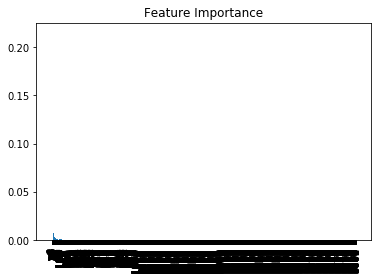

In [53]:
plt.figure()
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]),rotation=90)

# Show plot
plt.show()

In [43]:
names = [X_train.feature_names[i] for i in indices]


AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [99]:
Fimp=(dict(zip(X_train.columns, reg.feature_importances_)))
Fimp1 = sorted(Fimp.items(), key=lambda x: x[1],reverse=True) 
Fimp1

[('LINE_ID', 0.11659176626191983),
 ('END_USER_SPECIFIC_PRODUCTS_OIL AND GAS EXTRACTION. OIL AND GAS EXTRACTION.',
  0.0611233961833509),
 ('SHIP_TO_COUNTRY_SA', 0.03826482355848739),
 ('SHIP_TO_COUNTRY_US', 0.036950085258164594),
 ('OE_TRANSACTION_TYPES_Order_TD_NonUS EndUse_USA_VLVS', 0.023657454652133647),
 ('SHIP_TO_COUNTRY_CA', 0.022965283152887768),
 ('ULTIMATE_DEST_United Arab Emirates', 0.021516624722331762),
 ('SHIPPING_METHOD_CODE_DHL-PARCEL-GLOBAL - EXPRESS 2 TO 4 DAYS',
  0.019447142291512728),
 ('ULTIMATE_DEST_Canada', 0.016835315137260665),
 ('ORDERED_ITEM_R585CX00082', 0.016812982524373445),
 ('ORDERED_ITEM_1U3890X0062', 0.013837746071163675),
 ('ORDERED_QUANTITY', 0.011600132688417369),
 ('SHIP_TO_COUNTRY_FR', 0.011580314150757593),
 ('ULTIMATE_DEST_Japan', 0.010154105550592046),
 ('SHIP_TO_COUNTRY_JP', 0.008765756000784088),
 ('SHIPPING_METHOD_CODE_UPS-PARCEL-GLOBAL - NEXT DAY BY NOON',
  0.008601906499909015),
 ('SHIPPING_METHOD_CODE_UPS-PARCEL-STD SERVICE', 0.0085829

In [91]:
pd.DataFrame(X_train.columns,importance)

0
0.116592                                           LINE_ID
0.000000                                      hold_applied
0.006481                                  SHIPPED_QUANTITY
0.011600                                  ORDERED_QUANTITY
0.005867  OE_TRANSACTION_TYPES_Order_Intercompany USA_VLVS
...                                                    ...
0.000790                                SHIP_TO_COUNTRY_VI
0.000000                              SHIP_FROM_COUNTRY_BS
0.214481                              SHIP_FROM_COUNTRY_US
0.000000                              SHIP_FROM_COUNTRY_BS
0.000000                              SHIP_FROM_COUNTRY_US

[3603 rows x 1 columns]

In [92]:
importance.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [93]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [38]:
newdf1.to_csv("C:/Users/manohara.a/Downloads/emerson/pdsl.csv")